<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/08_2_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [2]:
%matplotlib inline

#패션 MNIST 데이터 불러오기

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_scaled = X_train.reshape(-1,28,28,1)/255.0 #데이터 2D->3D 가 60000개 인 것(그림 잘 이해하기!!!)
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [4]:
X_train_scaled.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [5]:
X_val_scaled.shape

(12000, 28, 28, 1)

#합성곱 신경망 만들기

In [6]:
model = keras.Sequential()
# 첫번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #입력층 크기, 커널 정보만 설정
model.add(keras.layers.MaxPooling2D(2))

# 이미지 - 일반적인 도형적인 특성에 대한 필터링 진행(선, 면, 등등) -> general
# 아래로 내려갈수록 special , detail 특성 필터링


# conv2d : (28,28,1)->32개 이므로 3차원은 표현하지 않음(depth정보 없으므로 위의 shape로 확인하기)
# 학습된 파라미터의 개수는 32 * 9(3*3) = 288 + 32(b) = 320개

In [7]:
len(model.layers[0].weights)
# layers[0] = Conv2D

2

In [8]:
model.layers[0].weights[0].shape #weights = 가중치 -> filter정보(32개의 가중치 크기)
#[3, 3, 1] -> 3x3 x1 입력을 28x28x1 로 했으니 맞춰서 나옴

TensorShape([3, 3, 1, 32])

In [9]:
model.layers[0].weights[1].shape # filter 32개의 bias

TensorShape([32])

In [10]:
model.layers[1]

In [11]:
##두번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 학습 parameter없음, FeatureMap의 size만 줄어듦

In [12]:
model.add(keras.layers.Flatten()) #최종으로 나온 FeatureMap 을 뉴런 3136개로 flatten
model.add(keras.layers.Dense(100, activation='relu')) #100개 뉴런 은닉층
model.add(keras.layers.Dropout(0.4)) # 드롭아웃 -> 뉴런 40% 비활성화
model.add(keras.layers.Dense(10, activation='softmax')) # 10개 뉴런 출력층

In [13]:
model.layers[2].weights[0].shape # 3*3*32*64=18432 + 64(bias) = 18496

TensorShape([3, 3, 32, 64])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

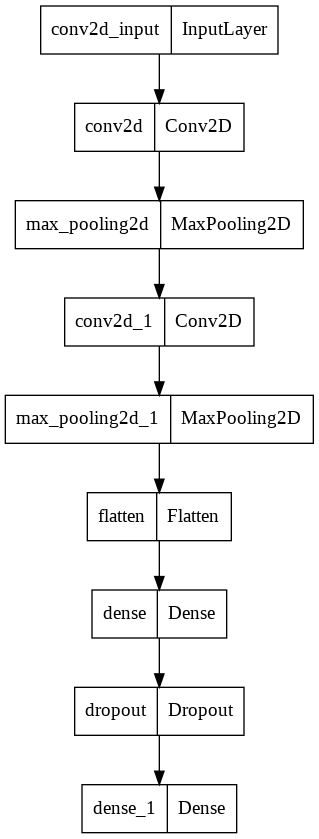

In [15]:
keras.utils.plot_model(model)

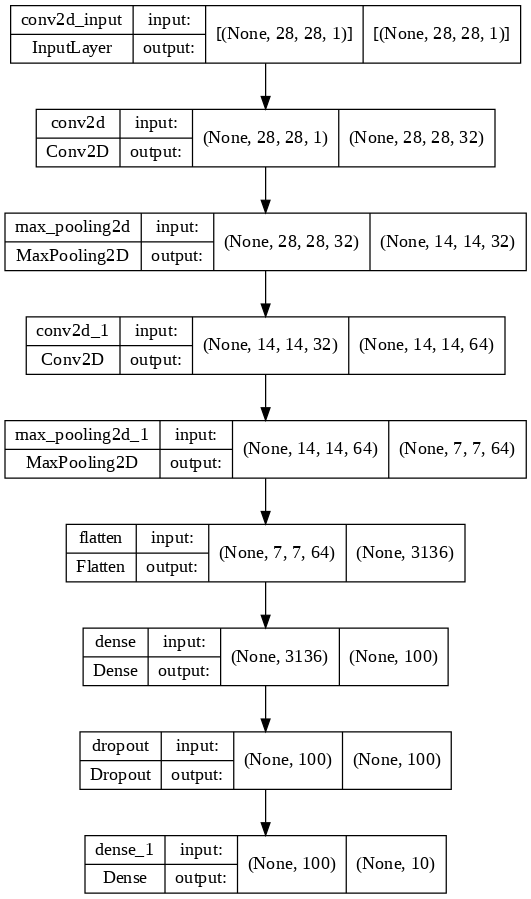

In [16]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)
# InputLayer 표시가 나온다! (Flatten 쓰지 않아도 나옴)

maxPooling2D - 까지가 CNN  
flatten - 부터 DNN

#모델 컴파일과 훈련

In [17]:
y_train[0:1] # --> sparse_categorical_crossentropy 사용

array([7], dtype=uint8)

In [18]:
keras.utils.to_categorical(y_train)[0:1] # one-hot-encoding --> categorical_crossentropy 사용

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 12s 7ms/step - loss: 0.5053 - accuracy: 0.8186 - val_loss: 0.3318 - val_accuracy: 0.8770
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3428 - accuracy: 0.8774 - val_loss: 0.2993 - val_accuracy: 0.8871
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2928 - accuracy: 0.8955 - val_loss: 0.2535 - val_accuracy: 0.9049
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2610 - accuracy: 0.9048 - val_loss: 0.2370 - val_accuracy: 0.9129
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2308 - accuracy: 0.9140 - val_loss: 0.2321 - val_accuracy: 0.9147
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2102 - accuracy: 0.9227 - val_loss: 0.2225 - val_accuracy: 0.9190
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1938 - accuracy: 0.9278 - val_loss: 0.2225 - val_ac

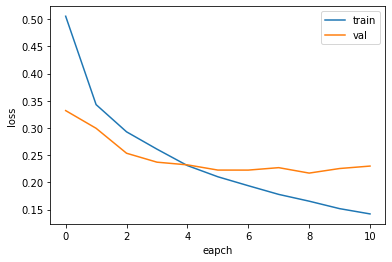

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eapch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# epoch = 20 -> 19번까지 돌아야 하지만, early_stop = 10에서 멈췄다

# best-fit = 8 임을 알 수 있음!

In [21]:
model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 3ms/step - loss: 0.2170 - accuracy: 0.9233


[0.21697008609771729, 0.9232500195503235]

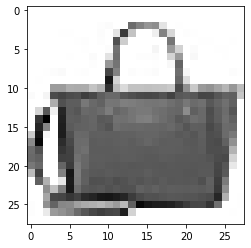

In [22]:
plt.imshow(X_val_scaled[0].reshape(28,28), cmap='gray_r') # 3차원->2차원
plt.show()

In [23]:
preds = model.predict(X_val_scaled[0:1]) #슬라이싱 사용 -> (1,28,28,1) 구조가 바뀌지 않도록
print(preds)

#softmax 를 통해 얻은 확률임!

[[1.9304933e-23 2.1864544e-35 2.8257466e-30 1.9744809e-30 3.7585666e-26
  1.5728500e-21 2.0733444e-25 2.0124853e-17 1.0000000e+00 6.6610822e-23]]


In [29]:
np.argmax(preds) # 확률이 제일 큰 값의 인덱스

8

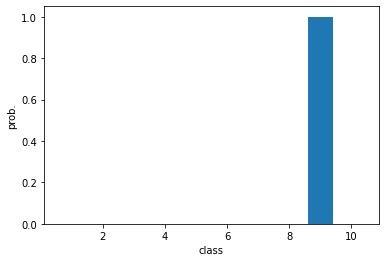

In [24]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [25]:
classes = ['티셔츠', '바지', '스웨터','드레스','코드','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [26]:
print(classes[np.argmax(preds)]) # How? CNN이 어떻게 featureMap을 만들었는지를 봐야 함 -> 뒤에서 시각화 작업

가방


In [27]:
test_scaled = X_test.reshape(-1, 28, 28, 1)/255.0
model.evaluate(test_scaled, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2432 - accuracy: 0.9195


[0.24317672848701477, 0.9194999933242798]